In [1]:
import pandas as pd
import sqlite3
from pandas.plotting import scatter_matrix

In [2]:
conn = sqlite3.connect('..\\data\\checking-logs.sqlite.sqlite_copy')

In [3]:
df = pd.io.sql.read_sql("""
select * from test limit 10
    """,
    conn
)
df

,index,uid,labname,first_commit_ts,first_view_ts
0,3,user_17,project1,2020-04-18 07:56:45.408648,2020-04-18 10:56:55.833899
1,4,user_30,laba04,2020-04-18 13:36:53.971502,2020-04-17 22:46:26.785035
2,7,user_30,laba04s,2020-04-18 14:51:37.498399,2020-04-17 22:46:26.785035
3,8,user_14,laba04,2020-04-18 15:14:00.312338,2020-04-18 10:53:52.623447
4,11,user_14,laba04s,2020-04-18 22:30:30.247628,2020-04-18 10:53:52.623447
5,18,user_19,laba04,2020-04-20 19:05:01.297780,2020-04-21 20:30:38.034966
6,19,user_25,laba04,2020-04-20 19:16:50.673054,2020-05-09 23:54:54.260791
7,20,user_21,laba04,2020-04-21 17:48:00.487806,2020-04-22 22:40:36.824081
8,21,user_30,project1,2020-04-22 12:36:24.053518,2020-04-17 22:46:26.785035
9,23,user_21,laba04s,2020-04-22 20:09:21.857747,2020-04-22 22:40:36.824081


In [7]:
df = pd.io.sql.read_sql(
    """
    select diff.avg_diff, views.pageviews, comm.num_commits
    from
        (select uid, avg(avg_diff) as avg_diff 
        from
            (select uid, cast((julianday(t.first_commit_ts) - julianday(datetime(dl.deadlines, 'unixepoch'))) * 24 as integer) as avg_diff
            from test t
            left join deadlines dl on t.labname = dl.labs
            where not t.labname = 'project1'
            ) kk 
        group by uid)diff 
    left join
        (select uid, count(*) as pageviews
        from pageviews
        group by uid
        )views 
        on diff.uid = views.uid 
    left join
        (select uid, count(*) as num_commits
        from checker
        where labname != 'project1'
        group by uid
        )comm 
        on diff.uid = comm.uid
    """,
    conn
)
df

,avg_diff,pageviews,num_commits
0,-64.400000,28,62
1,-74.800000,89,20
2,-159.000000,143,61
3,-61.600000,47,51
4,-5.666667,3,5
5,-98.750000,16,118
6,-95.500000,10,65
7,-92.600000,179,79
8,-86.400000,149,60
9,-105.400000,317,18


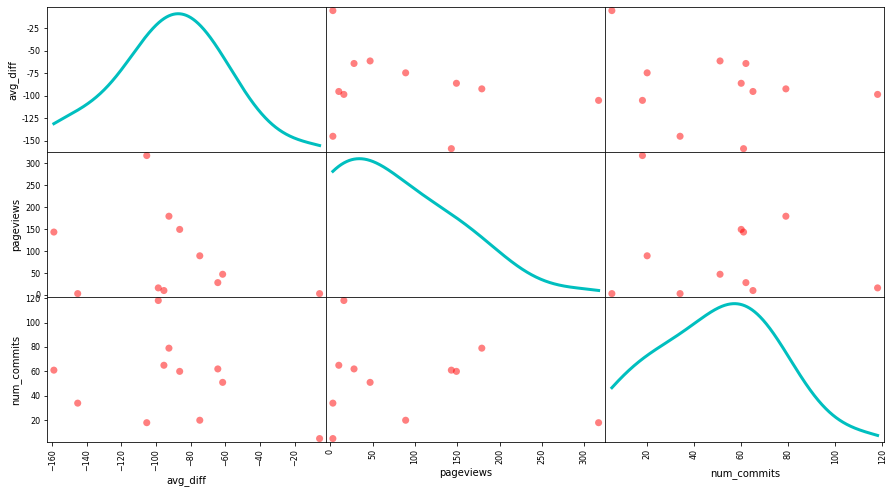

In [10]:
ax = scatter_matrix(df, figsize=(15, 8), s=200, diagonal='kde',
    density_kwds={'color':'c', 'linewidth':3}, color='red')

Да
Нет
Да
Нет

## Маленькое кол-во коммитов при маленьком просмотре 
## Нет
## Маленькое среднее значение при маленком количестве просмотров
## Нет
## Много пользователей и при маленьком количестве коммитов и при большом
## Да
## Много с маленькой середниой и мало с большой серединой
## Нет

In [11]:
conn.close()